# S-method with NUFFT

In [1]:
using PyPlot
import DSP

In [2]:
include("../juwvid.jl")

juwvid

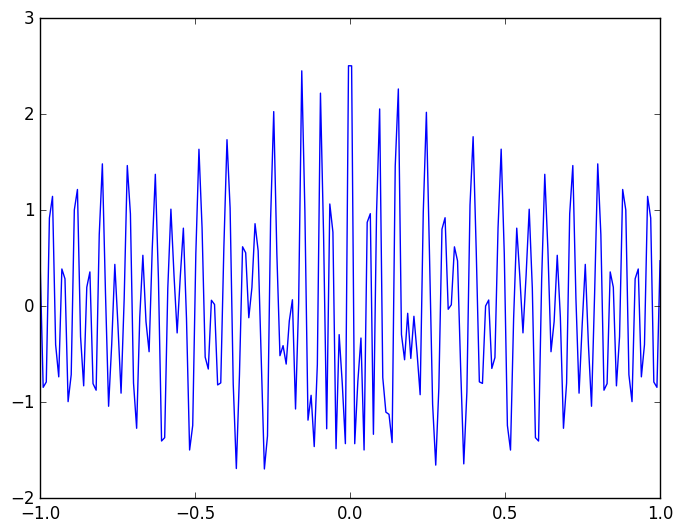

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3198b7410>

In [3]:
# multicomponent data (modified Example 6.2.2)
nsample=200
t,x=sampledata.genmultifm622x(nsample);
PyPlot.plot(t,x)

Single Wigner Ville
Use fft.


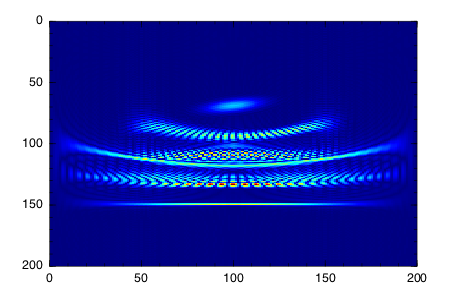

In [6]:
# Wigner Ville suffers the cross talk
z=DSP.Util.hilbert(x);
tfr=cohenclass.tfrwv(z);
imagesc(abs(tfr[end:-1:1,:]))

Use fft.


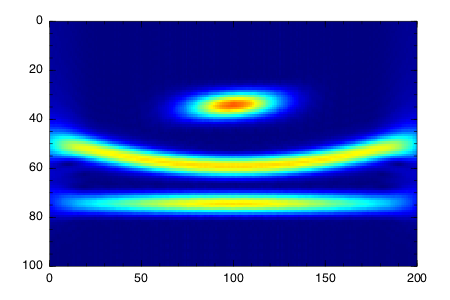

In [8]:
# STFT does not, but it's a poor resolution
tfrstft=stft.tfrstft(x,NaN,NaN,NaN,NaN,4);
imagesc(abs(tfrstft[end/2:-1:1,:]))

Use nufft.


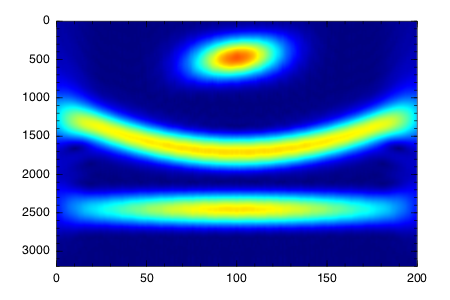

In [9]:
# The results of the STFT w/ NUFFT shows that the poor resolution is not due to the sampling rate
fin=collect(linspace(10,75,nsample*16));
tfrstft=stft.tfrstft(x,NaN,NaN,fin,NaN,4);
imagesc(abs(tfrstft[end:-1:1,:]))

Use fft.


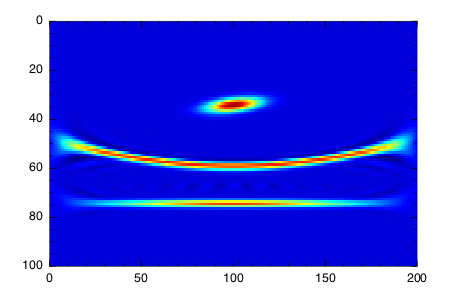

In [11]:
# The S-method w/o NuFFT suppresses the cross talk. 
sm=smethod.tfrsm(x,5,NaN,2)
imagesc(sm[end/2:-1:1,:])

Use nufft.


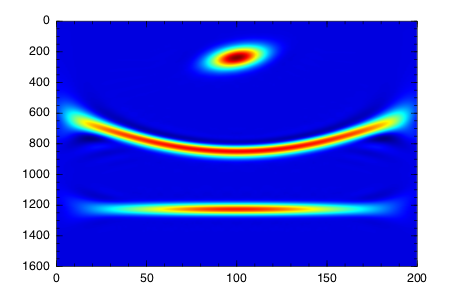

In [12]:
# The S-method w/ NuFFT improves the sampling rate.
fin=collect(linspace(10,75,nsample*8));
sm=smethod.tfrsm(x,100,fin,2)
imagesc(sm[end:-1:1,:])